# Installing Dependencies

In [ ]:
!pip install --upgrade rulefit interpret skope-rules
!pip install --no-deps git+https://github.com/maxfrenzel/CompressionVAE.git
!pip install cmasher
!pip install dython
!pip install distfit
!pip install rpy2==3.4.5

!apt-get install libmpc-dev
!apt-get install libgmp3-dev 
!apt-get install libmpfr-dev 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.6 MB 7.3 MB/s 
     |████████████████████████████████| 569 kB 55.9 MB/s 
     |████████████████████████████████| 275 kB 54.2 MB/s 
     |████████████████████████████████| 280 kB 52.7 MB/s 
     |████████████████████████████████| 3.6 MB 52.5 MB/s 
     |████████████████████████████████| 6.0 MB 42.6 MB/s 
     |████████████████████████████████| 9.9 MB 33.4 MB/s 
     |████████████████████████████████| 756 kB 45.6 MB/s 
     |████████████████████████████████| 254 kB 46.0 MB/s 
     |████████████████████████████████| 1.6 MB 42.2 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 52 kB 940 kB/s 
     |████████████████████████████████| 115 kB 47.3 MB/s 
  Created wheel for rulefit: filename=rulefit-0.3.1-py3-none-any.whl size=7825 sha256=fb3bf0d1ad7f555b3bbe472b18eb7b4c406a0540f379c03b5f752f53e8c6e83b
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/maxfrenzel/CompressionVAE.git to /tmp/pip-req-build-1umev1lo
  Running command git clone -q https://github.com/maxfrenzel/CompressionVAE.git /tmp/pip-req-build-1umev1lo
  Created wheel for cvae: filename=cvae-0.0.3-py3-none-any.whl size=24597 sha256=f8e2707fa9f77cf0c5a5d3390fb22c1aad623ecb00fc09936d6de4de06c12c17
  Stored in directory: /tmp/pip-ephem-wheel-cache-d40wn_pb/wheels/43/48/ca/723d503fe280e78457b971a234180dfee750c137374e60bb44
Successfully built cvae
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 367 kB 5.2 MB/s 
     |████████████████████████████████| 40 kB 6.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 7.2 MB/s 
     |████████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Loading the Libraries

In [10]:
#Importing the Libraries

#data processing
import numpy as np
import pandas as pd
import os
import datetime
import math
import functools
import random
from sklearn.preprocessing import StandardScaler,QuantileTransformer,RobustScaler,Normalizer,MaxAbsScaler,MinMaxScaler,PowerTransformer



#viz
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import plotly.graph_objs as go
import plotly
from plotly.subplots import make_subplots
from distfit import distfit

#stats and modelling tools
import scipy.stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model, tree, naive_bayes, neighbors, ensemble,\
                    neural_network, svm, decomposition, manifold
from rulefit import RuleFit
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from interpret.perf import ROC


# Data Understanding 1

In [11]:
# os.environ['KAGGLE_USERNAME'] = "ramdhanhidayat" # kaggle
# os.environ['KAGGLE_KEY'] = "2df718737bb55b47ec188ea1547e7e92" # key from the json file

# #download dataset from kaggle
# !kaggle datasets download -d imakash3011/customer-personality-analysis

# #unzip the downloaded data to 'data' folder
# !unzip customer-personality-analysis.zip -d data

#loading data
marketing_df = pd.read_csv('data/marketing_campaign.csv', sep='\t')

## Data Dictionary

To understand what was loaded, the following is the data dictionary, as described in 
the source:

**People**

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made - with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [ ]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Now we are going to take a peak at what the summary statistics are for each one of our 
features

In [ ]:
marketing_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


## Missing Value

In [ ]:
marketing_df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Text(68.09375, 0.5, 'Columns')

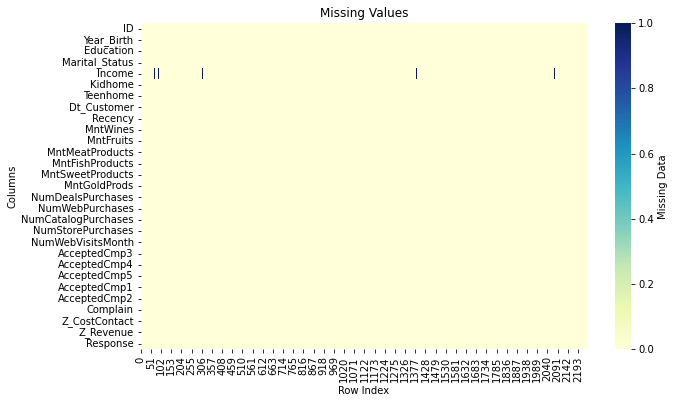

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(marketing_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.title('Missing Values', fontsize=12)
plt.xlabel('Row Index', fontsize = 10) 
plt.ylabel('Columns', fontsize = 10)

# Data Cleaning 

### Fixing Data Type

In [12]:
#drop missing values
marketing_df_cln = marketing_df.copy().dropna()

#change data type
marketing_df_cln['Dt_Customer'] = pd.to_datetime(marketing_df['Dt_Customer'])

floats = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' ]

for col in floats:
  #change data type
  marketing_df_cln[col] = marketing_df_cln[col].astype('float64')

bools = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'Complain', 'Response']
for col in bools:
  marketing_df_cln[col] = marketing_df_cln[col].astype('bool')


### Feature Enginereing

**LRFM (Length, Recency, Frequency, Monetary)**

In [13]:
#Customer_for
num_days = []
dates = marketing_df_cln['Dt_Customer'].apply(lambda x: x.date())
d1 = max(dates)

for i in dates:
  delta = d1 - i
  num_days.append(delta)

marketing_df_cln['Customer_For'] = num_days
marketing_df_cln['Customer_For'] = pd.to_numeric(marketing_df_cln['Customer_For'], errors='coerce')

#Age of customer today
marketing_df_cln['Age'] = 2022 - marketing_df_cln['Year_Birth']

#Total spendings on various items
marketing_df_cln['TotalSpent'] = marketing_df_cln['MntWines'] + marketing_df_cln['MntFruits'] + marketing_df_cln['MntMeatProducts'] + marketing_df_cln['MntFishProducts'] + marketing_df_cln['MntSweetProducts'] + marketing_df_cln['MntGoldProds']

#living situation by marital status
marketing_df_cln['Living_With'] = marketing_df_cln['Marital_Status'].replace({
    "Married":"Partner", "Together":"Partner", "Absurd":"Alone",
    "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"
})

#Feature indicating total children living in the household
marketing_df_cln['Children'] = marketing_df_cln['Kidhome'] + marketing_df_cln['Teenhome']

#Feature for total members in the household
marketing_df_cln['Family_Size'] = marketing_df_cln['Living_With'].replace({"Alone": 1, "Partner":2}) + marketing_df_cln['Children']

#Feature parenthood status
marketing_df_cln["Is_Parent"] = np.where(marketing_df_cln["Children"]>0, 1, 0)
marketing_df_cln["Is_Parent"] = marketing_df_cln["Is_Parent"].astype('bool')

#Education segmentation
marketing_df_cln["Education"] = marketing_df_cln["Education"]\
                      .replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", "Graduation":"Graduate", 
                                "Master":"Postgraduate", "PhD":"Postgraduate"})

#Generation
conditions = [
    marketing_df_cln['Year_Birth'].lt(1922),
    marketing_df_cln['Year_Birth'].ge(1922) & marketing_df_cln['Year_Birth'].le(1927),
    marketing_df_cln['Year_Birth'].ge(1928) & marketing_df_cln['Year_Birth'].le(1945),
    marketing_df_cln['Year_Birth'].ge(1946) & marketing_df_cln['Year_Birth'].le(1954),
    marketing_df_cln['Year_Birth'].ge(1955) & marketing_df_cln['Year_Birth'].le(1964),
    marketing_df_cln['Year_Birth'].ge(1965) & marketing_df_cln['Year_Birth'].le(1980),
    marketing_df_cln['Year_Birth'].ge(1981) & marketing_df_cln['Year_Birth'].le(1996),
    marketing_df_cln['Year_Birth'].ge(1997) & marketing_df_cln['Year_Birth'].le(2012),
    marketing_df_cln['Year_Birth'].ge(2010) & marketing_df_cln['Year_Birth'].le(2025)
]

generations = ['Pre-WWII', 'WWII', 'Post-War', 'Boomers1', 'Boomers2', 'Gen-X', 'Millenials', 'Gen-Z', 'Gen-Alpha']
marketing_df_cln['generation'] = np.select(conditions, generations)

#dropping some redundant features
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'ID', 'Year_Birth']

marketing_df_cln = marketing_df_cln.drop(to_drop, axis=1)

In [ ]:
marketing_df_cln.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_For', 'Age',
       'TotalSpent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'generation'],
      dtype='object')

# Exploratory Data Analysis

Let's start with analyzing the distributions of numerical features and look for outliers before going further

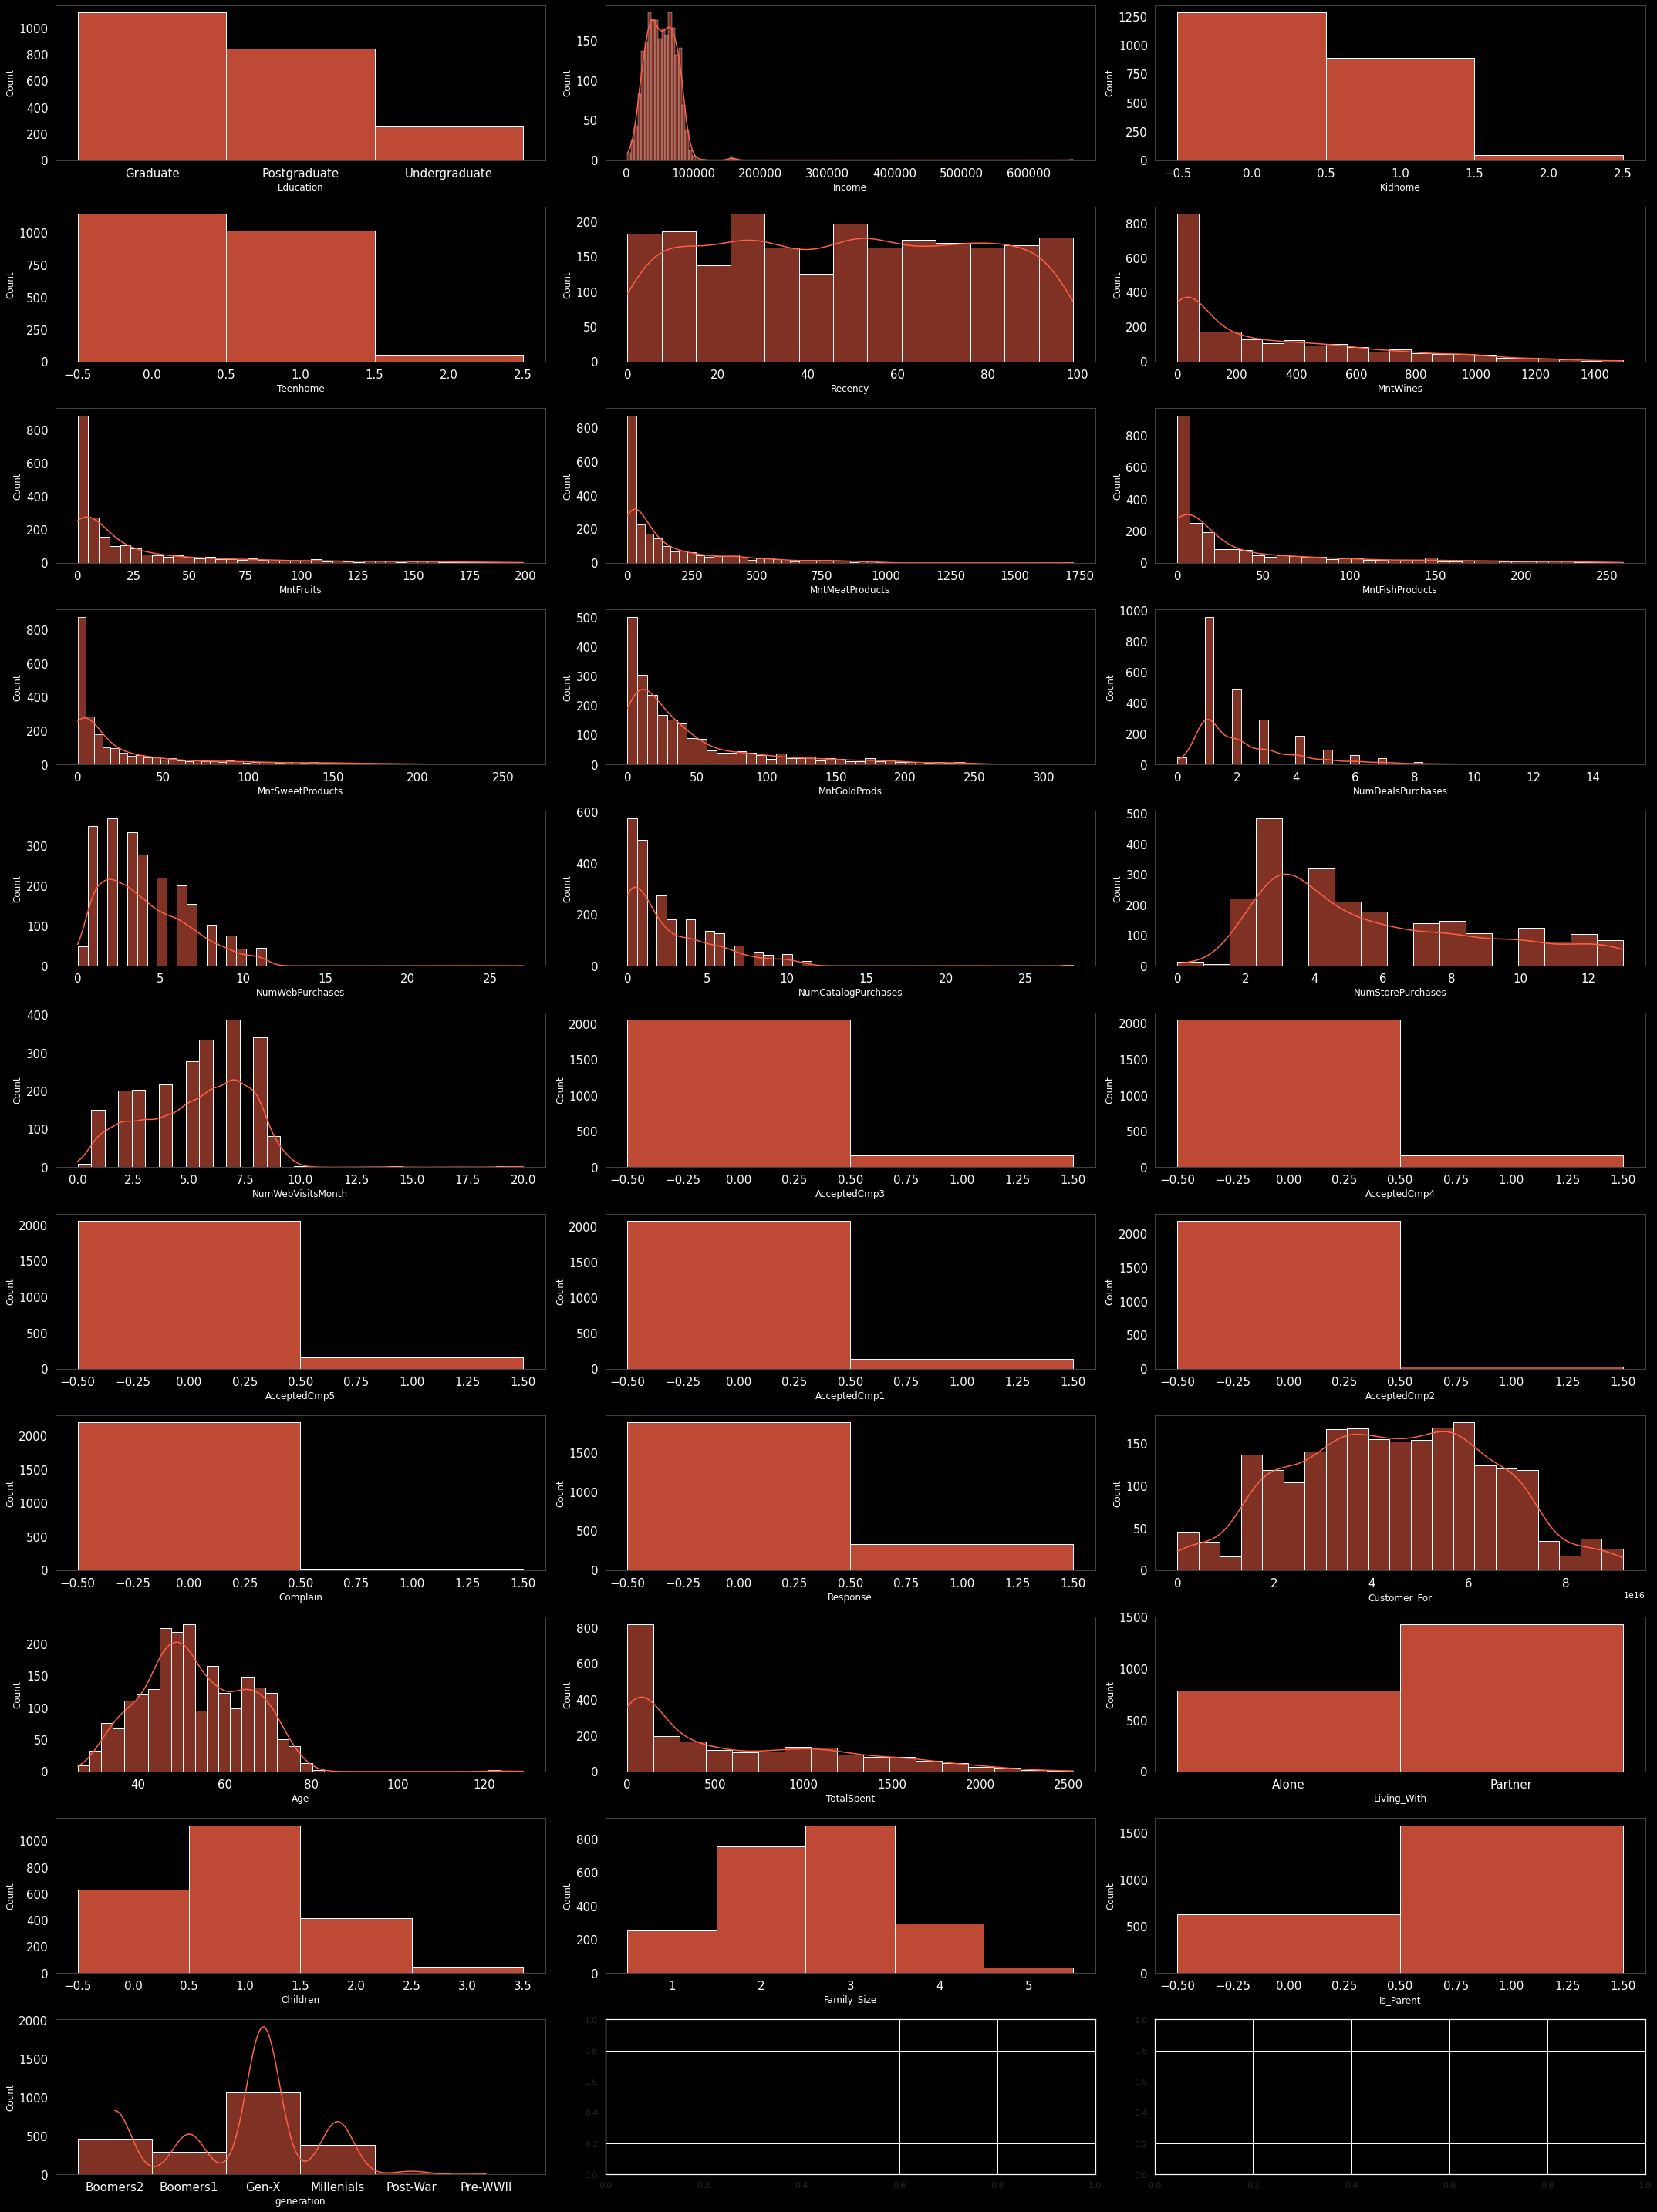

In [14]:
plot_ncols = 3
plot_nrows = math.ceil(len(marketing_df_cln.columns)/plot_ncols)


sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'k', 'axes.labelcolor':'white', 'text.color':'white'})
f, axes = plt.subplots(plot_nrows, plot_ncols, figsize=(30,40), sharex=False, sharey=False, facecolor='black')
for ax, feature in zip(axes.flat, marketing_df_cln.columns):
  ax.tick_params(labelcolor='white',labelsize=15)
  ax.grid(False)
  for _,s in ax.spines.items():
      s.set_linewidth(0.5)
      s.set_color('grey')
  if marketing_df_cln[feature].nunique() > 5:
    sns.histplot(marketing_df_cln[feature], color='tomato', kde=True, ax=ax)
  else: 
    sns.histplot(marketing_df_cln[feature], color='tomato', kde=False, discrete=True, ax=ax)

# or plt.suptitle('Main title')
plt.tight_layout()


## Outlier

In [15]:
num_df = marketing_df_cln.select_dtypes(include=np.number)
nunique_df = pd.DataFrame(data=num_df.apply(pd.Series.nunique), columns=['nunique']).rename_axis('variables')
selection = nunique_df[nunique_df['nunique'] > 5].index

#plotly frame setup
to_plot = num_df[selection]
plot_ncols = 4
plot_nrows = 4
fig = make_subplots(rows=plot_nrows, cols=plot_ncols, subplot_titles=tuple(to_plot.columns))

#add traces
x = 0
for i in range(1, plot_nrows+1):
  for j in range(1, plot_ncols+1):
    fig.add_trace(go.Box(y=to_plot[to_plot.columns[x]], name=to_plot.columns[x]), row=i, col=j)

    x=x+1

fig.update_layout(height=1400, width=1200, showlegend=False, template='plotly_dark', title='Boxplot of Numerical Features')
fig.update_xaxes(visible=False, showticklabels=False)

fig.show()

**Highlights**

The boxplot above shows that tere are possible outliers on the following features:
- Income, MntFruits, MntMeatProducts, MntSweetProducts, MntGoldProds, MntFishProducts, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumWebVisitsMonth, Age, and TotalSpent

Before deciding wether outliers found should be remove, let's calculate how many percentage of the data are considered as outliers by the Inter-quartile Range method used by the boxplot


In [ ]:
#count outliers
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3-Q1


#outlier dataframe
outlier_count = ((num_df < (Q1-1.5*IQR)) | (num_df > (Q3 + 1.5*IQR))).sum() #outlier count 
outlier_df = pd.DataFrame(outlier_count, columns=['outlier_count']).rename_axis('variable')
outlier_df['percentage'] = outlier_df['outlier_count']/len(num_df)*100 #outlier percentage columns

#select numerical columns with unique values more than 5 
# numerical_df = data[[c for c in list(data) if data[c].nunique()>5]].select_dtypes(include=np.number)


pd.set_option('display.precision', 2)
outlier_df.sort_values('outlier_count', ascending=False).style.background_gradient(cmap='gist_heat').set_caption('Outlier Count')

,outlier_count,percentage
variable,,
MntFruits,246,11.10
MntSweetProducts,246,11.10
MntFishProducts,222,10.02
MntGoldProds,205,9.25
MntMeatProducts,174,7.85
AcceptedCmp5,162,7.31
NumDealsPurchases,84,3.79
Children,50,2.26
MntWines,35,1.58


The above table shows the number of data points are considered as outlier by the IQR method for each variable. In addition, the proportion of outliers with respect to all observations displayed on the second column.

We can see that some variables have a high percentage of their data labeled as outliers. We need to be careful with removing the labeled outliers from these columns as those could actually be really aren't outliers, but part of natural variance of the population parameter from each variable.

Therefore, we will only remove some part of the outliers. The criteria for this would be the data points which distance from the nearest data point is significantly large. For example, MntMeatProducts from 1582 to 1725 are significantly far from the next lower value 984. The same rule will be applied on all variables.

In [16]:
#filter multiple conditions
def conjunction(*conditions):
  return functools.reduce(np.logical_and, conditions)

cond1 = marketing_df_cln.Age < 90
cond2 = marketing_df_cln.Income < 150000
cond3 = marketing_df_cln.NumCatalogPurchases < 11
cond4 = marketing_df_cln.NumWebVisitsMonth < 13
cond5 = marketing_df_cln.NumWebPurchases < 20
cond6 = marketing_df_cln.MntSweetProducts < 200
cond7 = marketing_df_cln.MntMeatProducts < 1500
cond8 = marketing_df_cln.MntGoldProds < 290



marketing_df_cln = marketing_df_cln[conjunction(cond1, cond2, cond3, cond4, cond5, cond6, cond7, cond8)]
print("Number of data points after outlier removal:", len(marketing_df_cln))

Number of data points after outlier removal: 2173


In [ ]:
num_df = marketing_df_cln.select_dtypes(include=np.number)
nunique_df = pd.DataFrame(data=num_df.apply(pd.Series.nunique), columns=['nunique']).rename_axis('variables')
selection = nunique_df[nunique_df['nunique'] > 5].index

#plotly frame setup
to_plot = num_df[selection].copy()
plot_ncols = 4
plot_nrows = 4
fig = make_subplots(rows=plot_nrows, cols=plot_ncols, subplot_titles=tuple(to_plot.columns))

#add traces
x = 0
for i in range(1, plot_nrows+1):
  for j in range(1, plot_ncols+1):
    fig.add_trace(go.Box(y=to_plot[to_plot.columns[x]], name=to_plot.columns[x]), row=i, col=j)

    x=x+1

fig.update_layout(height=1400, width=1000, showlegend=False, template='plotly_dark', title='Boxplot of Numerical Features')
fig.update_xaxes(visible=False, showticklabels=False)

fig.show()

Nex

In [17]:
# Import Tableau Visualisation 
from IPython.display import IFrame

In [18]:
IFrame('https://public.tableau.com/views/eda2_16684956193440/PurchaseAgeFamSize2?:showVizHome=no&:embed=true:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link', width=1600, height=1000)

Insights:
- Generation X (Gen-X) tends to complain more than other generation category.

In [1]:
%load_ext rpy2.ipython

import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr, data
from rpy2.robjects import pandas2ri
from functools import partial
from rpy2.ipython import html
html.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")
import rpy2.ipython.html
rpy2.ipython.html.init_printing()


pandas2ri.activate()
rpy2.__path__

In [6]:
from rpy2.robjects.packages import importr
utils = importr('utils')
base = importr('base')

dataf = utils.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/'
                       'master/notebooks/data/california_cities.csv')

In [ ]:
# R vector of strings
from rpy2.robjects.vectors import StrVector
# import rpy2's package module
import rpy2.robjects.packages as rpackages
# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# R package names
packnames = ('ggplot2', 'ggstatsplot', 'PMCMRplus', 'rstantools')


# Selectively install what needs to be install.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

In [20]:
marketing_df_cln.to_csv('marketing_cln.csv', encoding='utf-8', index=False)
dataf = utils.read_csv('marketing_cln.csv')

In [21]:
dataf

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Complain,Response,Customer_For,Age,TotalSpent,Living_With,Children,Family_Size,Is_Parent,generation
1,Graduate,58138.0,0,0,58,635.0,88.0,546.0,172.0,88.0,...,False,True,8.389440e+16,65,1617.0,Alone,0,1,False,Boomers2
2,Graduate,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,...,False,False,1.080000e+16,68,27.0,Alone,2,3,True,Boomers1
3,Graduate,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,...,False,False,4.078080e+16,57,776.0,Partner,0,2,False,Gen-X
4,Graduate,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,...,False,False,5.616000e+15,38,53.0,Partner,1,3,True,Millenials
5,Postgraduate,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,...,False,False,2.773440e+16,41,422.0,Partner,1,3,True,Millenials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,Graduate,61223.0,0,1,46,709.0,43.0,182.0,42.0,118.0,...,False,False,4.674240e+16,55,1341.0,Partner,1,3,True,Gen-X
2170,Postgraduate,64014.0,2,1,56,406.0,0.0,30.0,0.0,0.0,...,False,False,5.270400e+15,76,444.0,Partner,3,5,True,Boomers1
2171,Graduate,56981.0,0,0,91,908.0,48.0,217.0,32.0,12.0,...,False,False,2.721600e+16,41,1241.0,Alone,0,1,False,Millenials
2172,Postgraduate,69245.0,0,1,8,428.0,30.0,214.0,80.0,30.0,...,False,False,2.730240e+16,66,843.0,Partner,1,3,True,Boomers2


In [ ]:
%%R -i dataf

library(ggstatsplot)
library(dplyr)
library(ggplot2)
library(PMCMRplus)
library(rstantools)

In [64]:
%%R -i dataf

dataf %>% glimpse()

Rows: 2,173
Columns: 31
$ Education           <chr> "Graduate", "Graduate", "Graduate", "Graduate", "P…
$ Income              <dbl> 58138, 46344, 71613, 26646, 58293, 62513, 55635, 3…
$ Kidhome             <int> 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,…
$ Teenhome            <int> 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,…
$ Recency             <int> 58, 38, 26, 26, 94, 16, 34, 32, 19, 59, 82, 53, 38…
$ MntWines            <dbl> 635, 11, 426, 11, 173, 520, 235, 76, 14, 6, 194, 2…
$ MntFruits           <dbl> 88, 1, 49, 4, 43, 42, 65, 10, 0, 16, 61, 2, 14, 22…
$ MntMeatProducts     <dbl> 546, 6, 127, 20, 118, 98, 164, 56, 24, 11, 480, 53…
$ MntFishProducts     <dbl> 172, 2, 111, 10, 46, 0, 50, 3, 3, 11, 225, 3, 6, 5…
$ MntSweetProducts    <dbl> 88, 1, 21, 3, 27, 42, 49, 1, 3, 1, 112, 5, 1, 68, …
$ MntGoldProds        <dbl> 88, 6, 42, 5, 15, 14, 27, 23, 2, 16, 30, 14, 5, 45…
$ NumDealsPurchases   <int> 3, 2, 1, 2, 5, 2, 4, 2, 1, 1, 1, 3, 1, 1, 3, 2, 2,…
$ NumWebPurchase

In [73]:
%%R -i dataf

dataf2 <- dataf %>% 
            mutate(Complain = recode(Complain, 'True'=TRUE, 'False'=FALSE),
                   Is_Parent = recode(Is_Parent, 'True'=TRUE, 'False'=FALSE),
                   AcceptedCmp1 = recode(AcceptedCmp4, 'True'=TRUE, 'False'=FALSE),
                   AcceptedCmp2 = recode(AcceptedCmp4, 'True'=TRUE, 'False'=FALSE),
                   AcceptedCmp3 = recode(AcceptedCmp4, 'True'=TRUE, 'False'=FALSE),
                   AcceptedCmp4 = recode(AcceptedCmp4, 'True'=TRUE, 'False'=FALSE),
                   Response = recode(Response, 'True'=TRUE, 'False'=FALSE))

In [124]:
%%R 

temp <- dataf2 %>% 
          select(c(generation, Complain, Response)) %>%
          dplyr::group_by(generation) %>%
          dplyr::summarise(complain_count = sum(Complain),response_count = sum(Response)) %>%
          as.data.frame()


# plot1 <- ggbetweenstats(
#             data  = temp,
#             x     = generation,
#             y     = response_count
#             # title = "Distribution of total spent by campaign response",
#             # centrality.label.args = list(size  = 6),
#             # ggsignif.args = list(textsize = 6, tip_length = 0.01)
#           )

print(dim(temp))
temp

[1] 5 3
  generation complain_count response_count
1   Boomers1              4             42
2   Boomers2              5             60
3      Gen-X              5            144
4 Millenials              5             73
5   Post-War              1              5


In [136]:
%%R

#Defining theme parameters

theme_text <- theme(
    # This is the new default font in the plot
    text = element_text(family = "Roboto", size = 8, color = "black"),
    plot.title = element_text(
      family = "Lobster Two", 
      size = 20,
      face = "bold",
      color = "#2a475e"
    ),
    # Statistical annotations below the main title
    plot.subtitle = element_text(
      family = "Roboto", 
      size = 15, 
      face = "bold",
      color="#1b2838"
    ),
    plot.title.position = "plot", # slightly different from default
    axis.text = element_text(size = 10, color = "black"),
    axis.title = element_text(size = 12)
  )

theme_bg <- theme(
    axis.ticks = element_blank(),
    axis.line = element_line(colour = "grey50"),
    panel.grid = element_line(color = "#b4aea9"),
    panel.grid.minor = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_line(linetype = "dashed"),
    panel.background = element_rect(fill = "#fbf9f4", color = "#fbf9f4"),
    plot.background = element_rect(fill = "#fbf9f4", color = "#fbf9f4")
  )

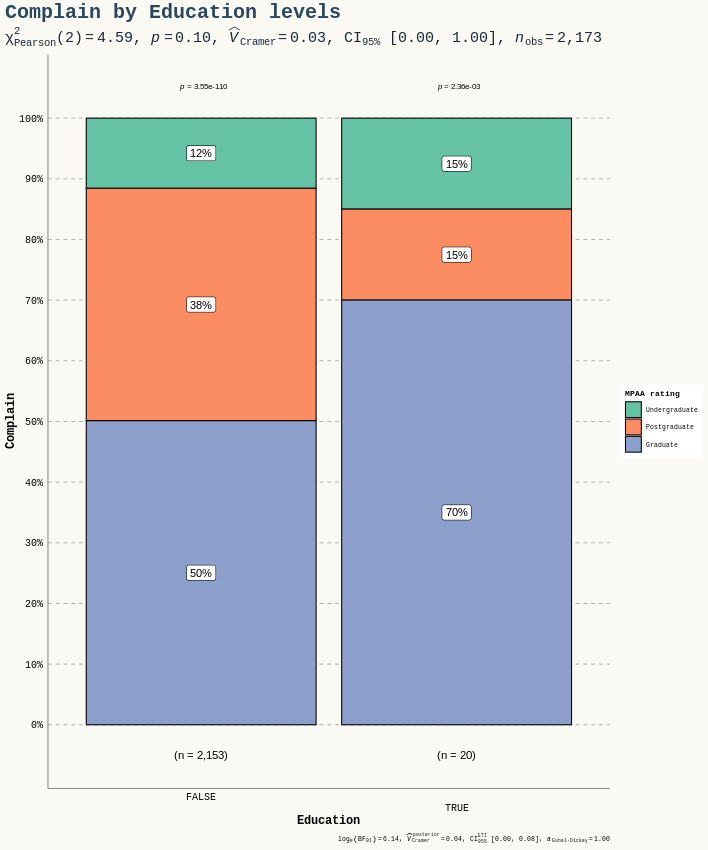

In [146]:
%%R -w 25 -h 30 -u cm

ggbarstats(
    data= dataf2,
    x = Education,
    y = Complain,
    title = "Complain by Education levels",
    xlab = "Education",
    ylab = "Complain",
    legend.title  = "MPAA rating",
    ggplot.component = list(ggplot2::scale_x_discrete(guide = ggplot2::guide_axis(n.dodge = 2))),
    palette          = "Set2"
  ) + theme_text + theme_bg

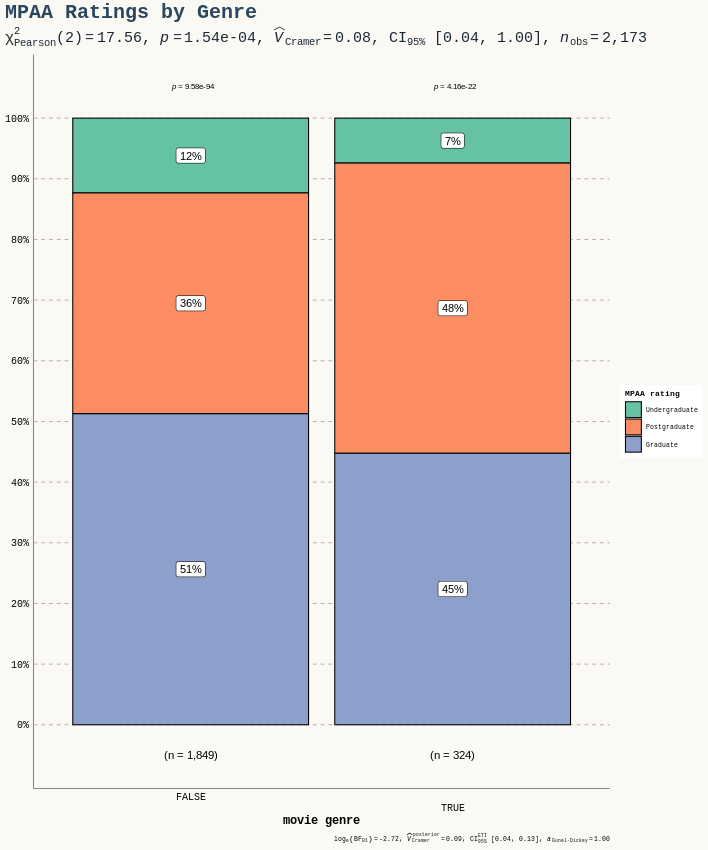

In [147]:
%%R -w 25 -h 30 -u cm

ggbarstats(
    data= dataf2,
    x = Education,
    y = Response,
    title = "MPAA Ratings by Genre",
    xlab = "movie genre",
    legend.title  = "MPAA rating",
    ggplot.component = list(ggplot2::scale_x_discrete(guide = ggplot2::guide_axis(n.dodge = 2))),
    palette          = "Set2"
  ) + theme_text + theme_bg


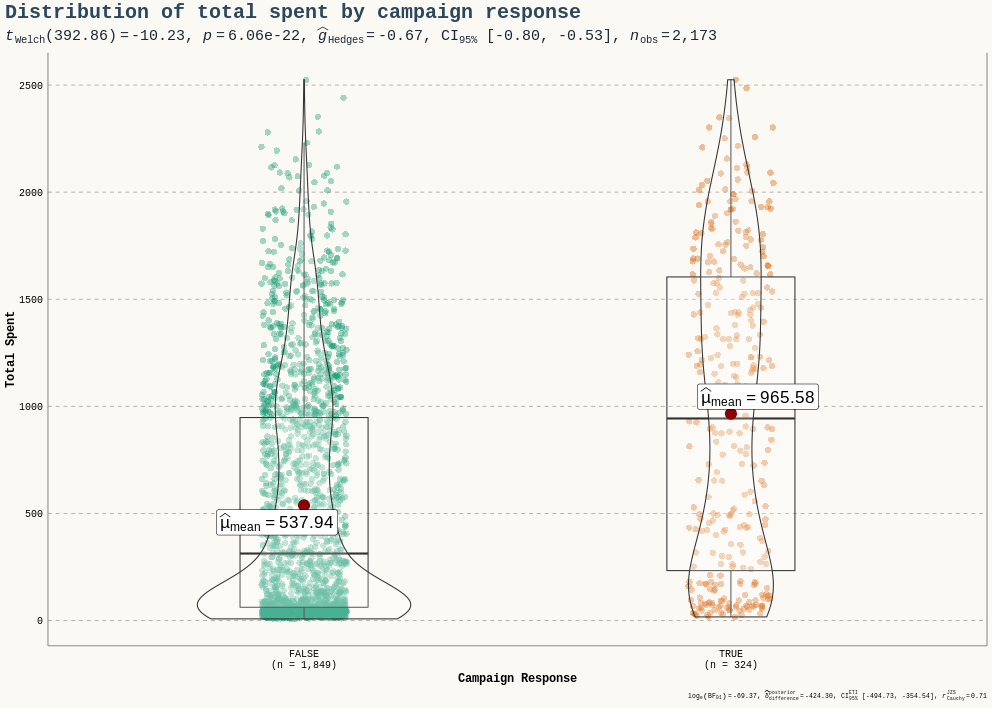

In [151]:
%%R -w 35 -h 25 -u cm

plot1 <- ggbetweenstats(
            data  = dataf2,
            x     = Response,
            y     = TotalSpent,
            title = "Distribution of total spent by campaign response",
            centrality.label.args = list(size  = 6),
            ggsignif.args = list(textsize = 6, tip_length = 0.01)
          )

plot1 <- plot1 + 
  # Add labels and title
  labs(
    x = "Campaign Response",
    y = "Total Spent",
    title = "Distribution of total spent by campaign response"
  ) + theme_text + theme_bg


plot1

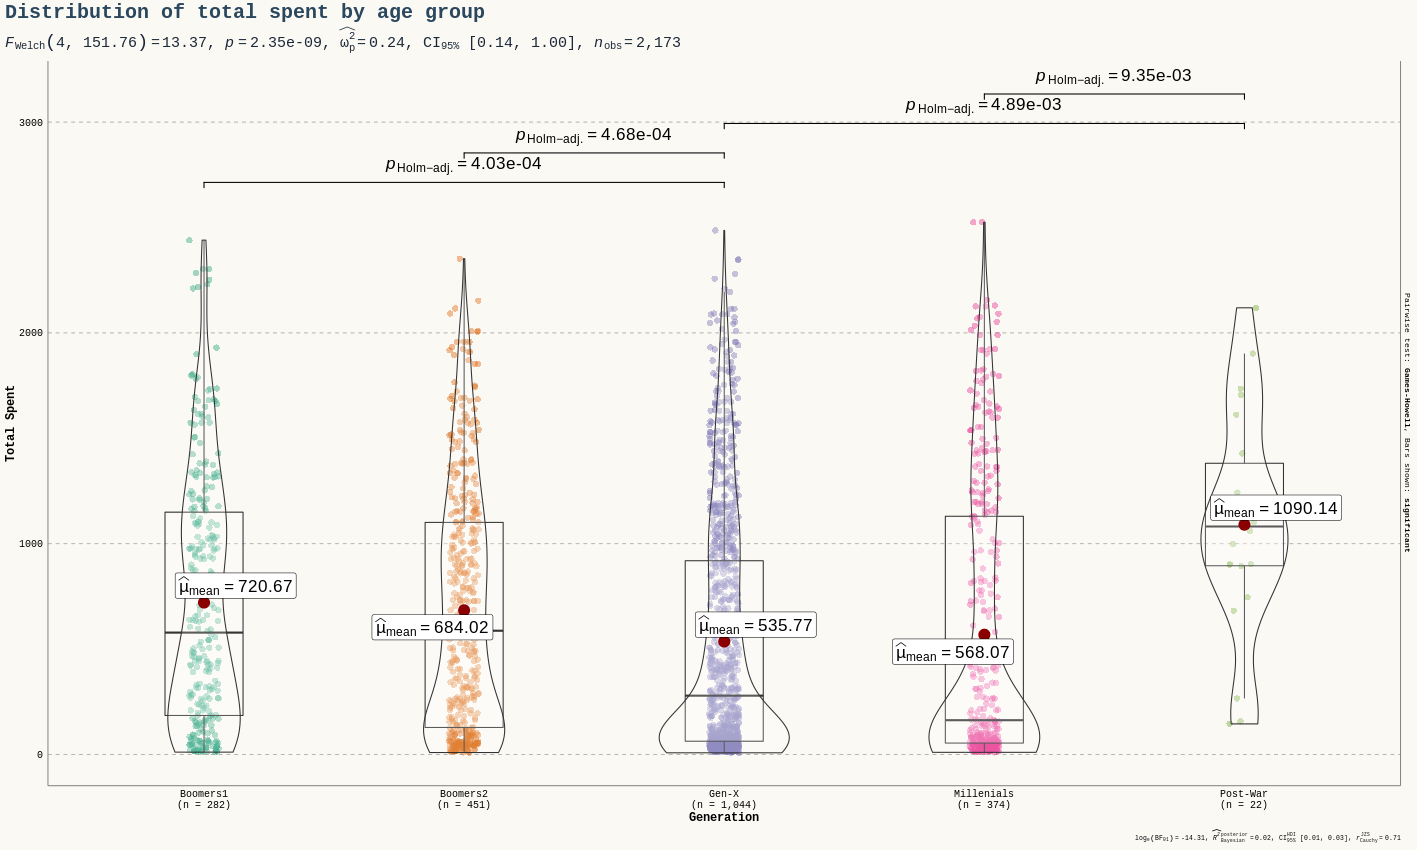

In [150]:
%%R -w 50 -h 30 -u cm

plot1 <- ggbetweenstats(
            data  = dataf2,
            x     = generation,
            y     = TotalSpent,
            title = "Distribution of total spent by age group",
            centrality.label.args = list(size  = 6),
            ggsignif.args = list(textsize = 6, tip_length = 0.01)
          )

plot1 <- plot1 + 
  # Add labels and title
  labs(
    x = "Generation",
    y = "Total Spent",
    title = "Distribution of total spent by age group"
  ) + theme_text + theme_bg


plot1

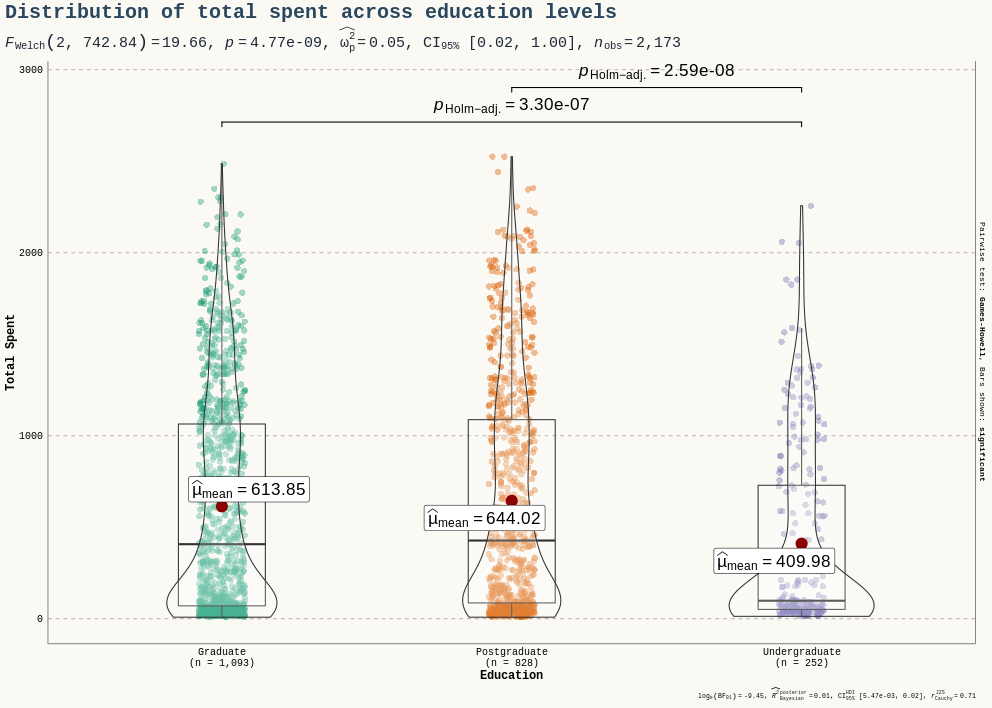

In [148]:
%%R -w 35 -h 25 -u cm

plot1 <- ggbetweenstats(
            data  = dataf,
            x     = Education,
            y     = TotalSpent,
            title = "Distribution of sepal length across Iris species",
            centrality.label.args = list(size  = 6),
            ggsignif.args = list(textsize = 6, tip_length = 0.01)
          )

plot1 <- plot1 + 
  # Add labels and title
  labs(
    x = "Education",
    y = "Total Spent",
    title = "Distribution of total spent across education levels"
  ) + theme_text + theme_bg
  

plot1

<div style="background: #DCDCDC">
<p style="font-family: Arials, sans-serif; font-size: 16px; color: #000000"><strong>INSIGHT:</strong> By analyzing the numeric data, it is established:</p>
<p style="font-family: Arials, sans-serif; font-size: 16px; color: #000000"><strong>User Rating:</strong></p>   
<ol style="font-family: Arials, sans-serif; font-size: 14px; line-height:1.5; color: rgba(0,0,0,.7)">
<li>Data is not distributed normally. Asymmetry is observed.</li>
<p></p>
<li>Average and median book ratings are 4.6.</li>
<p></p>
<li>There are outliers in the data. There are a small number of books in the data below the 4.1 rating.</li>
<p></p>
</ol>    
<p style="font-family: Arials, sans-serif; font-size: 16px; color: #000000"><strong>Reviews:</strong></p>  
<ol style="font-family: Arials, sans-serif; font-size: 14px; line-height:1.5; color: rgba(0,0,0,.7)">
<li>Data is not distributed normally. Asymmetry is observed.</li>
<p></p>
<li>The data has a wide range.</li>
<p></p>
<li>There are outliers in the data. There are a small number of books receiving reviews well above the 75 percentile.</li>
<p></p>
</ol> 
<p style="font-family: Arials, sans-serif; font-size: 16px; color: #000000"><strong>Price:</strong></p>  
<ol style="font-family: Arials, sans-serif; font-size: 14px; line-height:1.5; color: rgba(0,0,0,.7)">
<li>Data is not distributed normally. Asymmetry is observed.</li>
<p></p>
<li>There are books that cost much higher than the average, as well as books with a cost of 0, which is strange.There are books that cost much higher than the average, as well as books with a cost of 0, which is strange. Either the book is given for free or this error.</li>
<p></p>
</ol> 
</div>